<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Discrete-Fourier-Transform" data-toc-modified-id="The-Discrete-Fourier-Transform-1">The Discrete Fourier Transform</a></span></li><li><span><a href="#Computing-the-Discrete-Fourier-Transform" data-toc-modified-id="Computing-the-Discrete-Fourier-Transform-2">Computing the Discrete Fourier Transform</a></span></li><li><span><a href="#example0" data-toc-modified-id="example0-3">example0</a></span></li><li><span><a href="#example1" data-toc-modified-id="example1-4">example1</a></span></li><li><span><a href="#Blue-Whale-Moan" data-toc-modified-id="Blue-Whale-Moan-5">Blue Whale Moan</a></span></li></ul></div>

# The Discrete Fourier Transform
The FFT is a fast, `O[NlogN]` algorithm to compute the Discrete Fourier Transform (DFT), which naively is an `O[N²]` computation. The DFT, like the more familiar continuous version of the Fourier transform, has a forward and inverse form which are defined as follows:

**Forward Discrete Fourier Transform (DFT):**
$$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{\frac{-i~2\pi~k~n~}{~N}}
$$
**Inverse Discrete Fourier Transform (IDFT):**
$$
x_n = \frac{1}{N}\sum_{k=0}^{N-1} X_k e^{\frac{i~2\pi~k~n~}{~N}}
$$

# Computing the Discrete Fourier Transform
For simplicity, we'll concern ourself only with the forward transform, as the inverse transform can be implemented in a very similar manner. Taking a look at the DFT expression above, we see that it is nothing more than a straightforward linear operation: a matrix-vector multiplication of $\vec{x}$,

$$
\vec{X} = M \cdot \vec{x}
$$
with the matrix M given by
$$
M_{kn} = e^{\frac{-i~2\pi~k~n~}{~N}}
$$
With this in mind, we can compute the DFT using simple matrix multiplication as follows:

In [1]:
import numpy as np
def DFT(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    try:
        x=np.asarray(x, dtype=float)
    except TypeError:
        x=np.asarray(x, dtype=complex)
    N=x.shape[0]
    n=np.arange(N)
    M=np.exp(-2j * np.pi * n.reshape((N, 1)) * n / N)
    return np.dot(M, x)

Obviously this algorithm is scales as `O[N²]` which seems to be slow.
lets check an example below.

# example
## example0
**this example is taken from [wikipedia page](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Example)**

In [2]:
print(DFT([1,2-1j,-1j,-1+2j]))

[ 2.0000000e+00+0.j -2.0000000e+00-2.j  8.8817842e-16-2.j
  4.0000000e+00+4.j]


## example1
**this example is available in [here](http://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf)**\
Let the continuous signal be:
$$
 g(t)~=~2\cos(2\pi t-90°)
$$
$$
 h(t)~=~3\cos(4\pi t)
$$
$$
 f(t)~=~5~+~g(t)~+~h(t)
$$

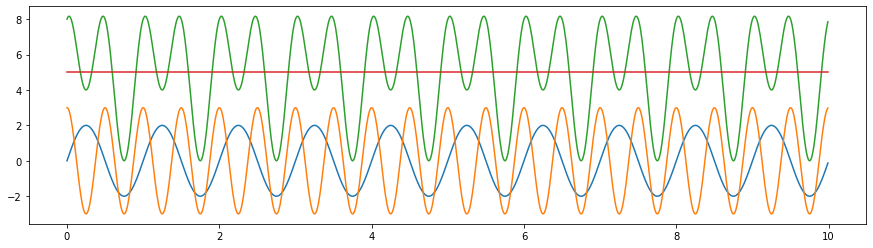

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 4] 
from math import cos,pi
g=lambda t:2*cos(2*pi*t-pi/2)
h=lambda t:3*cos(4*pi*t)
f=lambda t:5+g(t)+h(t)
xVal=np.arange(0,10,0.01)
plt.plot(xVal,[g(i) for i in xVal],
         xVal,[h(i) for i in xVal],
         xVal,[f(i) for i in xVal],
         xVal,[5    for i in xVal])
plt.show()

Let us sample $f(t)$ at 4 times per second (ie. $f_s~=~4Hz$) from $t=0$ to $t=\frac{3}{4}$. The values of the discrete samples are given by:
$$
f[k]~=~5~+2\cos(k\frac{\pi}{2}-90°)~+3\cos(k\pi)
$$
by putting:
$$
~t=kT_s=\frac{k}{4}
$$

In [4]:
N=4
Ts=1/4
discretF=[int(f(k*Ts)) for k in range(N)]
print(discretF)
# by calculating DFT
DFTofF=DFT(discretF)
print(DFTofF)

[8, 4, 8, 0]
[ 2.00000000e+01+0.00000000e+00j  2.44929360e-16-4.00000000e+00j
  1.20000000e+01+1.46957616e-15j -7.34788079e-16+4.00000000e+00j]


[20.0, 4.000000000000001, 12.0, 3.999999999999997]


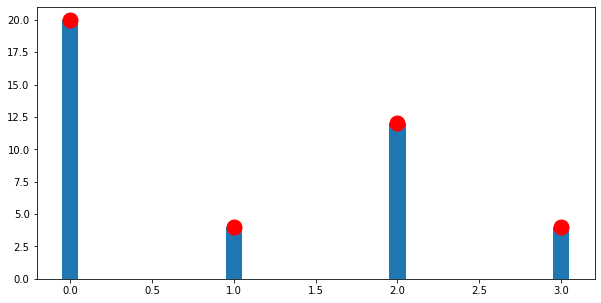

In [5]:
# The magnitude of the DFT coefficients is shown below
from math import sqrt
y=[sqrt(i.imag**2+i.real**2) for i in DFTofF]
print(y)
plt.rcParams['figure.figsize'] = [10, 5] 
plt.plot(range(N),y,'ro',markersize=15)
plt.bar(range(N),y,width=0.1)
plt.show()

## Blue Whale Moan
**this example is taken from [here](https://ch.mathworks.com/help/matlab/math/basic-spectral-analysis.html#bve7skg-2)\
The file `bluewhale.au` contains audio data from a Pacific blue whale vocalization recorded by underwater microphones off the coast of California. The file is from the library of animal vocalizations maintained by the Cornell University Bioacoustics Research Program.[Download link](https://github.com/R00ney/matlab_ngohara/blob/master/tutorials/resource_files/bluewhale.au?raw=true)

Because blue whale calls are so low, they are barely audible to humans. The time scale in the data is compressed by a factor of 10 to raise the pitch and make the call more clearly audible.Lets read and plot the audio data.

sound Sample rate is 4000


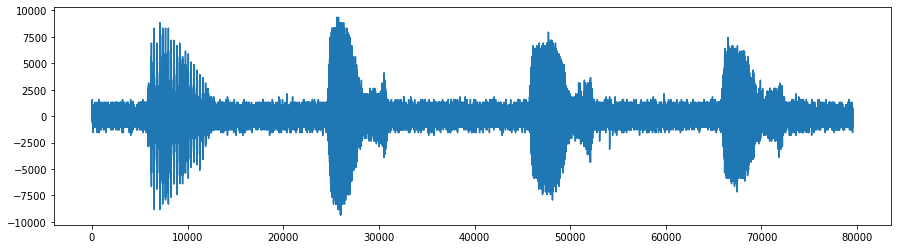

In [10]:
from scipy.io.wavfile import read
blueWhaleSoundAddress="bluewhale.wav"
dataRate,data=read(blueWhaleSoundAddress)
blueWhaleSound=np.array(data,dtype=float)
print(f"sound Sample rate is {dataRate}")
plt.plot(blueWhaleSound)
plt.show()
try:
    from playsound import playsound
    playsound(blueWhaleSoundAddress)
except:
    print("you dont have playsound module\nSimply install it using $pip install playsound")

The first sound is a "trill" followed by three "moans". This example analyzes a single moan. Specify new data that approximately consists of the first moan, and correct the time data to account for the factor-of-10 speed-up. Plot the truncated signal as a function of time.

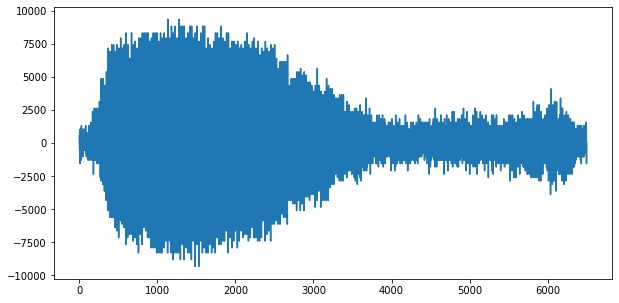

In [7]:
moanSound=blueWhaleSound[int(2.45e4):int(3.10e4)]
plt.plot(moanSound)
plt.show()

The Fourier transform of the data identifies frequency components of the audio signal. In some applications that process large amounts of data with fft, it is common to resize the input so that the number of samples is a power of 2. This can make the transform computation significantly faster, particularly for sample sizes with large prime factors. Specify a new signal length n that is a power of 2, and use the fft function to compute the discrete Fourier transform of the signal. fft automatically pads the original data with zeros to increase the sample size

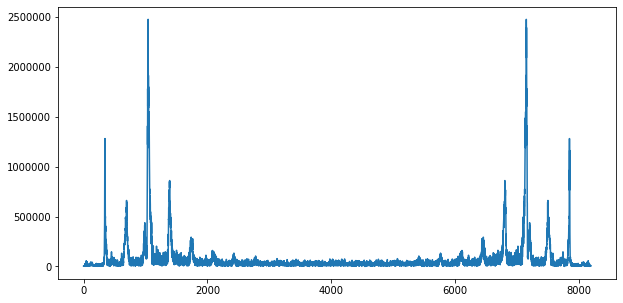

In [8]:
from math import log2
from numpy.fft import fft 
N=2**(int(log2(len(moanSound)))+1)
y = fft(moanSound,N)
y=[sqrt(i.imag**2+i.real**2) for i in y]
plt.plot(y)
plt.show()

as you see we used `numpy.fft.fft` instead of self-defined `DFT` function, which is much faster.As I mentioned before the self-defined `DFT` function scales as `O[N²]`, in other hands, the `numpy.fft.fft` function scales as `O[N lgN]` which waste less time in lsrge signals.